In [95]:
import torch
import pyro
import pyro.distributions as dist
from chirho.observational.handlers import condition
import matplotlib.pyplot as plt

tensor(11.3878) tensor(30.5337) tensor(94.6142)


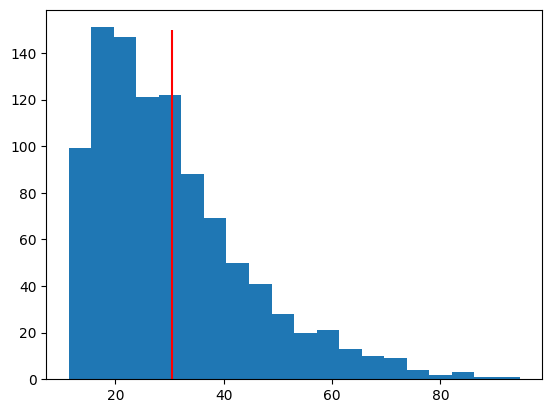

In [103]:
def imprecise_composition():
    Aprob = pyro.sample("Aprob", dist.Uniform(.1,.3))
    Bprob = pyro.sample("Bprob", dist.Uniform(.1,.3))
    
    ABprob = pyro.deterministic("ABprob", Aprob * Bprob)
    
    lh = pyro.deterministic("lh", 1/ABprob)

with pyro.poutine.trace() as prior:
    with pyro.plate("prior", 1000):
        imprecise_composition()
 


lh = prior.trace.nodes['lh']['value']
print(torch.min(lh), torch.mean(lh), torch.max(lh))        
plt.hist(lh, bins=20)
plt.vlines(torch.mean(lh), 0, 150, color='r')
plt.show()


In [107]:
with pyro.plate("testing_a_b", 1000):
    b = pyro.sample("b", dist.Beta(16,71))

print(torch.quantile(b, 0.01), torch.mean(b), torch.quantile(b, 0.99))
print(torch.pow(1/torch.mean(b),2))

tensor(0.1017) tensor(0.1844) tensor(0.2868)
tensor(29.4206)


tensor(15.5175) tensor(32.7851) tensor(65.6111)


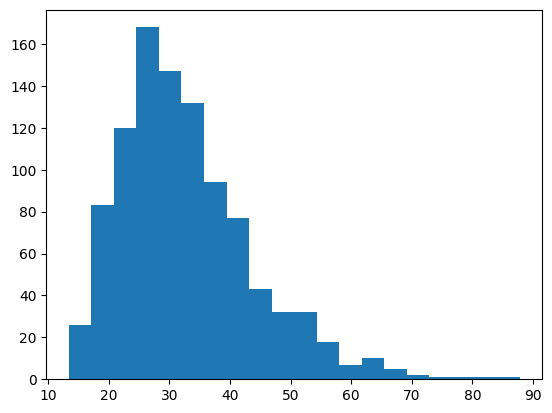

In [108]:
def beta_composition():
    Aprob = pyro.sample("Aprob", dist.Beta(16,71))
    Bprob = pyro.sample("Bprob", dist.Beta(16,71))
    
    ABprob = pyro.deterministic("ABprob", Aprob * Bprob)
    
    lh = pyro.deterministic("lh", 1/ABprob)
    
with pyro.poutine.trace() as prior:
    with pyro.plate("prior", 1000):
        beta_composition()

lh = prior.trace.nodes['lh']['value']
print(torch.quantile(lh, 0.01), torch.mean(lh), torch.quantile(lh, 0.99))
plt.hist(lh, bins=20)
plt.show()